In [13]:
import pandas as pd
import os
import glob
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
import os
import pandas as pd

def load_data(csv_file, video_folder):
    data = pd.read_csv(csv_file)
    video_names = data['video_name']
    labels = data['label']
    
    video_files = []
    for video_name in video_names:
        video_file = os.path.join(video_folder, video_name + '.mp4')
        video_files.append(video_file)
    
    return video_files, labels




In [15]:
import cv2
import numpy as np

def preprocess_data(video_paths, labels, target_height, target_width, batch_size=32, augmentation=True):
    # Initialize lists to store frames and corresponding labels
    frames = []
    processed_labels = []

    for video_path, label in zip(video_paths, labels):
        # Read video
        cap = cv2.VideoCapture(video_path)

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            
            # Resize frame
            frame = cv2.resize(frame, (target_width, target_height))

            # Data augmentation
            if augmentation:
                # Random horizontal flip
                if np.random.rand() < 0.5:
                    frame = cv2.flip(frame, 1)

                # Random rotation (between -10 and 10 degrees)
                angle = np.random.randint(-10, 11)
                rows, cols, _ = frame.shape
                M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
                frame = cv2.warpAffine(frame, M, (cols, rows))

                # Random brightness adjustment
                brightness = np.random.uniform(0.5, 1.5)
                frame = cv2.convertScaleAbs(frame, alpha=brightness)

            # Normalize frame
            frame = frame / 255.0  # Normalize pixel values to [0, 1]

            # Append frame and label
            frames.append(frame)
            processed_labels.append(label)

        cap.release()

    # Convert lists to numpy arrays
    frames = np.array(frames)
    processed_labels = np.array(processed_labels)

    return frames, processed_labels


In [16]:
def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [17]:
from sklearn.model_selection import train_test_split

def split_data(frames, labels, test_size=0.2, batch_size=4):
    # split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(frames, labels, test_size=test_size, random_state=42)
    
    # Calculate number of batches for training and testing
    train_batches = len(X_train) // batch_size
    test_batches = len(X_test) // batch_size
    
    # Ensure all data are divisible by batch size, discarding any remaining samples
    X_train = X_train[:train_batches * batch_size]
    y_train = y_train[:train_batches * batch_size]
    X_test = X_test[:test_batches * batch_size]
    y_test = y_test[:test_batches * batch_size]
    
    return X_train, X_test, y_train, y_test


csv_file = '/kaggle/input/csv-corrected/Shoplifting.csv'
video_folder = '/kaggle/input/newshop/newshop'
video_paths, labels = load_data(csv_file, video_folder)

# Preprocess data
target_height = 64
target_width = 64
frames, processed_labels = preprocess_data(video_paths, labels, target_height, target_width)
print(frames)

#Split data
X_train, X_test, y_train, y_test = split_data(frames, processed_labels)


[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.04705882 0.04705882 0.04705882]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.56078431 0.57254902 0.57254902]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   [0.00784314 0.00784314 0.00784314]
   ...
   [0.79215686 0.81960784 0.81568627]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.01960784 0.01960784 0.01960784]
   [0.30588235 0.31764706 0.34901961]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
   57/12288 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.7752 - loss: 0.6452 

W0000 00:00:1713532616.690085   10899 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12270/12288 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.4171

W0000 00:00:1713532647.781780   10898 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


12288/12288 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - accuracy: 0.8445 - loss: 0.4170 - val_accuracy: 0.8913 - val_loss: 0.2487
Epoch 2/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9114 - loss: 0.2043 - val_accuracy: 0.9361 - val_loss: 0.1505
Epoch 3/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9466 - loss: 0.1274 - val_accuracy: 0.9535 - val_loss: 0.1221
Epoch 4/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9581 - loss: 0.1024 - val_accuracy: 0.9578 - val_loss: 0.1009
Epoch 5/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9685 - loss: 0.0807 - val_accuracy: 0.9581 - val_loss: 0.1248
Epoch 6/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9746 - loss: 0.0670 - val_accuracy: 0.9676 - val_loss: 0.0884
Epoch 7/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9783 - loss: 0.0588 - val_accuracy: 0.9688 - val_loss: 0.0899
Epoch 8/10
12288/12288 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9796 - lo

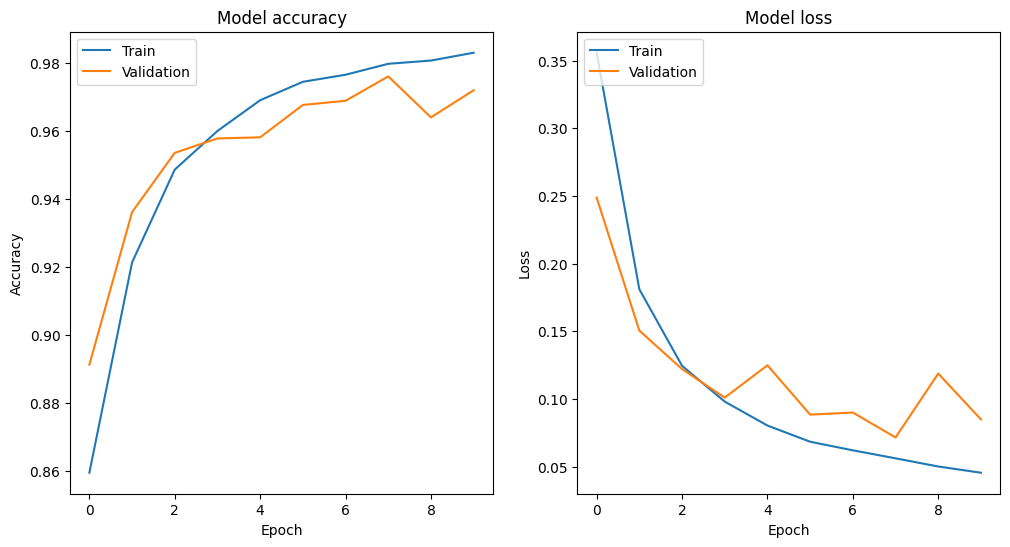

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

input_shape = (target_height, target_width, 3)
model = create_model(input_shape)

# compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=4, validation_data=(X_test, y_test))

# plot accuracy and loss curves
plt.figure(figsize=(12, 6))

# plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.84      1.00      0.91     10273
           1       0.00      0.00      0.00      2015

    accuracy                           0.84     12288
   macro avg       0.42      0.50      0.46     12288
weighted avg       0.70      0.84      0.76     12288



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


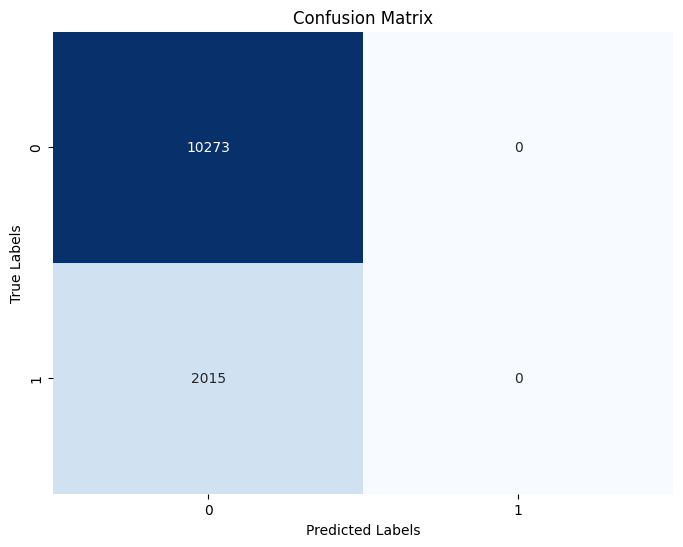

In [19]:
# Evaluate the model on the test set
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming one-hot encoding for predicted labels

# classification report
print(classification_report(y_test, y_pred_classes))

# confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
